---

# Data Mining:<br>Statistical Modeling and Learning from Data

## Dr. Ciro Cattuto<br>Dr. Laetitia Gauvin<br>Dr. André Panisson

### Exercises - Linear Regression

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## These data points will be used in the exercises:

x =  [[  1.]
 [  2.]
 [  3.]
 [  4.]
 [  5.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]]
y =  [[ 3.76405235]
 [ 3.20015721]
 [ 4.57873798]
 [ 6.6408932 ]
 [ 7.06755799]
 [ 5.02272212]
 [ 7.75008842]
 [ 7.44864279]
 [ 8.29678115]
 [ 9.6105985 ]]


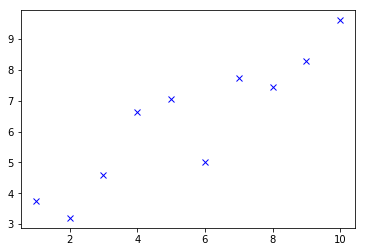

In [2]:
m = 10 # training examples
x = linspace(1, 10, m).reshape(m, 1)
y = array([ 3.76405235,  3.20015721,  4.57873798,  6.6408932 ,  7.06755799,
        5.02272212,  7.75008842,  7.44864279,  8.29678115,  9.6105985 ]).reshape(m, 1)

print 'x = ', x
print 'y = ', y

plot(x, y, 'bx')

### Let's prepare the data points for matrix manipulation:

In [3]:
X = insert(x, 0, ones(len(x)), axis=1)
Y = array(y).reshape(m, 1)

print 'X = \n', X
print 'Y = \n', Y

X = 
[[  1.   1.]
 [  1.   2.]
 [  1.   3.]
 [  1.   4.]
 [  1.   5.]
 [  1.   6.]
 [  1.   7.]
 [  1.   8.]
 [  1.   9.]
 [  1.  10.]]
Y = 
[[ 3.76405235]
 [ 3.20015721]
 [ 4.57873798]
 [ 6.6408932 ]
 [ 7.06755799]
 [ 5.02272212]
 [ 7.75008842]
 [ 7.44864279]
 [ 8.29678115]
 [ 9.6105985 ]]


# Exercises

## Exercise 1: Ordinary Least Squares

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement Linear Regression and use the Ordinary Least Squares (OLS) closed-form expression to find the estimated values of $\mathbf{w}$:

$$\mathbf{w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$$

w = 
[[ 2.87377128]
 [ 0.62986398]]


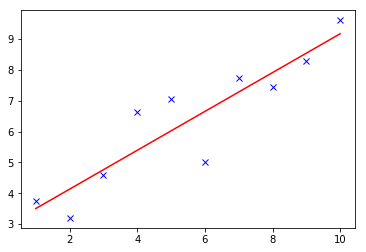

In [4]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

print 'w = \n', w

p = plot (X[:,1], Y, 'bx')
p = plot (X[:,1], X.dot(w), 'r-')

## Exercise 2: Batch Gradient Descent

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement the Batch Gradient Descent algorithm with $\mathbf{s}$ learning steps and learning rate $\alpha$.  
At each training step, update $\mathbf{w}$ with this rule:

$$\mathbf{w}_i := \mathbf{w}_i - \alpha \left(\left(\mathbf{X}\mathbf{w} - \mathbf{y}\right)^T\mathbf{X}_i\right)$$

[[ 2.5404884 ]
 [ 0.67773692]]


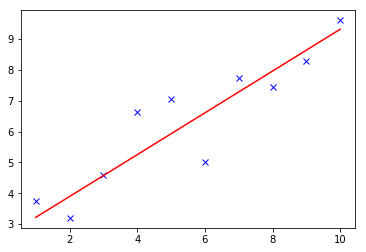

In [6]:
n, d = X.shape
s = 1000 # learning steps
alpha = 0.001 # learning rate

w = zeros(d).reshape(d, 1)

for step in range(s):
    w = w - alpha * (X.dot(w) - Y).T.dot(X).T

print w

p = plot (X[:,1], Y, 'bx')
p = plot (X[:,1], X.dot(w), 'r-')

## Exercise 3: Stochastic Gradient Descent

Find the weight values $\mathbf{w}$ that minimize the error $E_{\mathbf{in}}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^n {(\mathbf{w}^T \mathbf{X}_n - \mathbf{y}_n)^2}$.

For this, implement the Stochastic Gradient Descent algorithm with $\mathbf{s}$ learning steps and learning rate $\alpha$.
In each step, iterate through all $j$ samples and, for each sample, update $\mathbf{w}$ with this rule:

$$\mathbf{w}_i := \mathbf{w}_i - \alpha\left(\mathbf{X}^{(j)}\mathbf{w} - \mathbf{y}^{(j)}\right)\mathbf{X}^{(j)}_i$$

[[ 2.53358958]
 [ 0.67762494]]


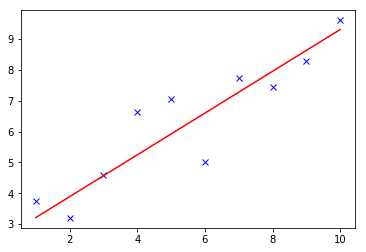

In [7]:
n, d = X.shape
s = 1000 # learning steps
alpha = 0.001 # learning rate

w = zeros(d).reshape(d, 1)

for step in range(s):
    for j in range(n):
        w -= alpha * (X[j].dot(w) - Y[j]).T.dot(X[[j], :].reshape(1,d)).reshape(d,1)

print w

p = plot (X[:,1], Y, 'bx')
p = plot (X[:,1], X.dot(w), 'r-')

## Exercise 4: write a function fit(X,Y) 

The function fit(X,Y) receives a matrix $X \in \mathbb{R}^{m,n}$, where m is the number of samples and n is the number of features, and a matrix $Y \in \mathbb{R}^{m}$, and returns the matrix of coefficients $\mathbf{w} \in \mathbb{R}^{n+1}$.   
Implement the function with Ordinary Least Squares

In [8]:
def fit(X, Y):
    X = insert(x, 0, ones(len(x)), axis=1)
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

w = 
[[ 2.87377128]
 [ 0.62986398]]


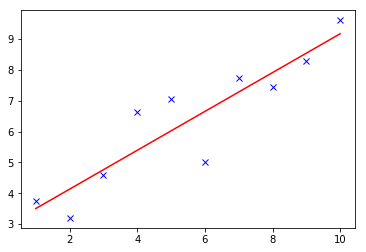

In [9]:
# let's test it!

m = 10
x = linspace(1, m, m).reshape(m,1)
y = array([ 3.76405235,  3.20015721,  4.57873798,  6.6408932 ,  7.06755799,
        5.02272212,  7.75008842,  7.44864279,  8.29678115,  9.6105985 ]).reshape(m,1)

w = fit(x,y)

print 'w = \n', w

p = plot (X[:,1], Y, 'bx')
p = plot (X[:,1], X.dot(w), 'r-')

# Using Scikit-Learn for Linear Regression

Check if Scikit-Learn is installed in your system. If not, install it.

Resources and documentation: http://scikit-learn.org/

In [10]:
import sklearn

## Exercise 5: find the coefficients $\mathbf{w}$ using sklearn.linear_model.LinearRegression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [11]:
from sklearn.linear_model import LinearRegression
LinearRegression?

Coefficients =  [ 0.62986398] , Intercept =  2.87377127867


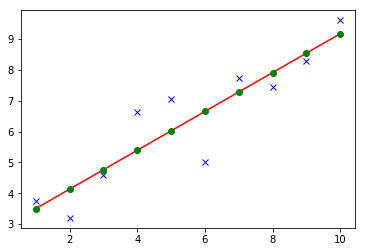

In [12]:
m = 10
x = linspace(1, m, m)
y = array([ 3.76405235,  3.20015721,  4.57873798,  6.6408932 ,  7.06755799,
        5.02272212,  7.75008842,  7.44864279,  8.29678115,  9.6105985 ])
x.shape = (m,1)

model = LinearRegression()
model.fit(x, y)

print 'Coefficients = ', model.coef_, ', Intercept = ', model.intercept_
# compare the results to the Ordinary Least Squares result!

p = plot (x, y, 'bx')
p = plot (x, x*model.coef_+model.intercept_, 'r-')
p = plot (x, model.predict(x), 'go')

## Exercise 6: find the coefficients $\mathbf{w}$ using sklearn.linear_model.Lasso

Regularization introduces a penalty in the model complexity, in order to prevent overfitting.  
Lasso (least absolute shrinkage and selection operator) uses the constraint that $\|\mathbf{w}\|_1$, the L1-norm of the parameter vector, is no greater than a given value.  
The optimization objective for Lasso is:
$$ \frac{1}{2n} \|\mathbf{Xw} - \mathbf{y}\|^2_2 + \alpha\|\mathbf{w}\|_1$$

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [13]:
from sklearn.linear_model import Lasso
Lasso?

Coefficients =  [ 0.50865186] , Intercept =  3.54043794533


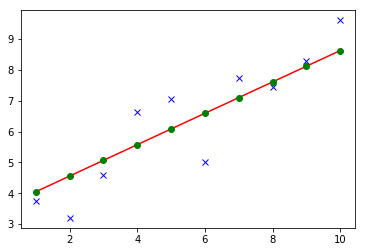

In [14]:
m = 10
x = linspace(1, m, m)
y = array([ 3.76405235,  3.20015721,  4.57873798,  6.6408932 ,  7.06755799,
        5.02272212,  7.75008842,  7.44864279,  8.29678115,  9.6105985 ])
x.shape = (m,1)

model = Lasso(alpha=1)
model.fit(x, y)

print 'Coefficients = ', model.coef_, ', Intercept = ', model.intercept_
# compare the results to the Ordinary Least Squares result!

p = plot (x, y, 'bx')
p = plot (x, x*model.coef_+model.intercept_, 'r-')
p = plot (x, model.predict(x), 'go')

# Working with the Boston house-prices dataset

Let's load the dataset and print the description

In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
print boston.DESCR

X = boston.data
y = boston.target

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now, create a plot for each feature, to have an idea of their correlation with the target variable

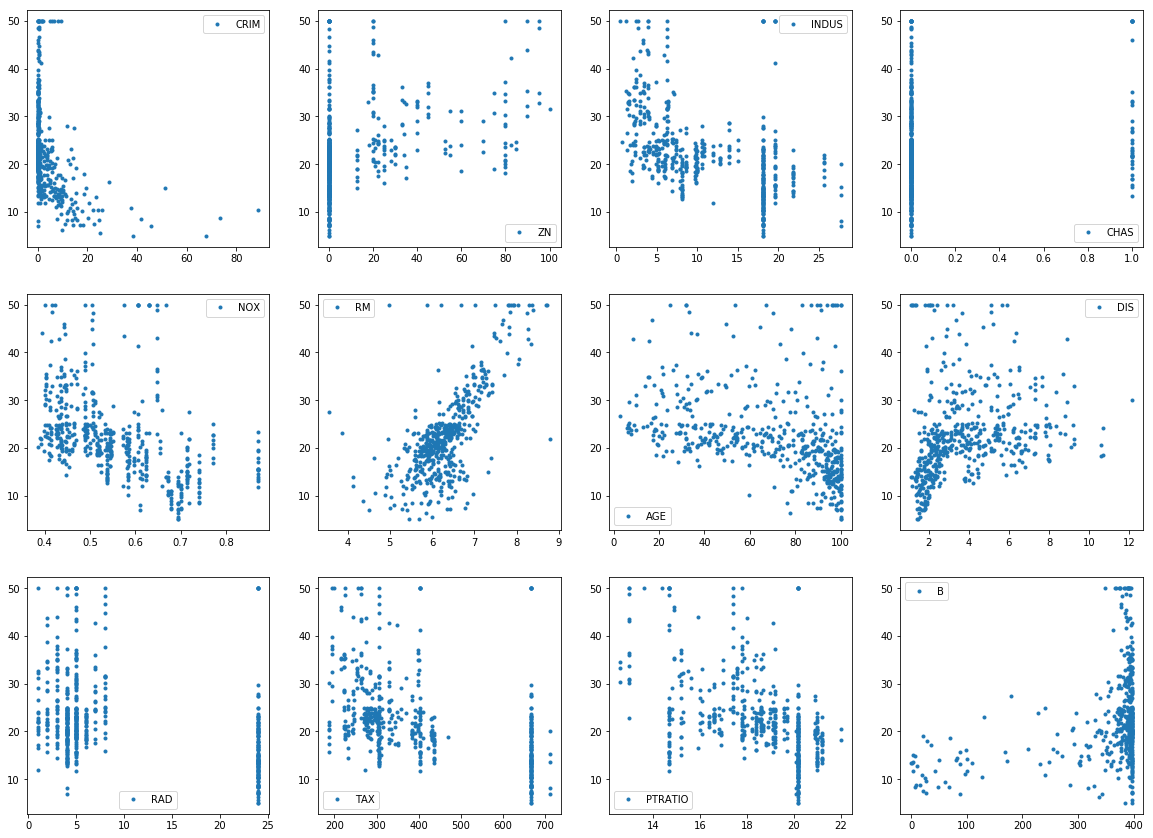

In [16]:
figure(figsize=(20,20))
nr_plots = len(boston.feature_names)-1

figure(figsize=(20,20))
nr_plots = len(boston.feature_names)-1
for i in range(nr_plots):
    ax = subplot(4, 4, i+1)
    ax.plot(X[:, i], y, '.', label=boston.feature_names[i])
    legend()

## Exercise 7: Create a Regression model using Scikit-Learn Linear Regression for the Boston house-prices dataset

Use sklearn.linear_model.LinearRegression to predict the target variable y using only the average number of rooms (RM)

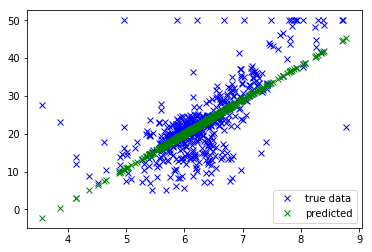

In [17]:
Xtrain = X[:,[5]]

model = LinearRegression()
model.fit(Xtrain, y)
pred = model.predict(Xtrain)

plot(Xtrain, y, 'bx', label='true data')
plot(Xtrain, pred, 'gx', label='predicted')
legend()

# Working with Train and Test sets

Let's split our dataset in the Training and Test sets

In [18]:
nr_cases = y.shape[0]
nTrain = np.floor(nr_cases *2.0 / 3.0)
import random
ids = range(nr_cases)
random.shuffle(ids)

trainX,trainY,testX,testY = [],[],[],[]
for i, idx in enumerate(ids):
    if i < nTrain:
        trainX.append(X[idx, [5]])
        trainY.append(y[idx])
    else:
        testX.append(X[idx, [5]])
        testY.append(y[idx])

## Exercise 8: Calculate the MAE and RMSE

Use only the samples in the training set to train your regression model (use sklearn.linear_model.LinearRegression).

Predict the values for the samples in the test set and calculate the **mean absolute error (MAE)** and the **root-mean-square error (RMSE)**.

In [19]:
def mae(testY, predY):
    return np.average(np.abs(testY - predY))

def rmse(testY, predY):
    return np.sqrt(np.average((testY - predY)**2))

# Train a Linear Regression model using only train data
model = LinearRegression()
model.fit(array(trainX), trainY)
# Predict the test values using the model
predY = model.predict(testX)

print mae(testY, predY)
print rmse(testY, predY)

4.28976008685
6.76095986951


## Exercise 9: Train with all features

Split the Boston house-prices dataset into Training and Test sets, but using all features. Train a regression model with all features, calculate the MAE and RMSE and compare it with the previous results.

In [20]:
nr_cases = y.shape[0]
nTrain = np.floor(nr_cases *2.0 / 3.0)
import random
ids = range(nr_cases)
random.shuffle(ids)

trainX,trainY,testX,testY = [],[],[],[]
for i, idx in enumerate(ids):
    if i < nTrain:
        trainX.append(X[idx])
        trainY.append(y[idx])
    else:
        testX.append(X[idx])
        testY.append(y[idx])

In [21]:
def mae(testY, predY):
    return np.average(np.abs(testY - predY))

def rmse(testY, predY):
    return np.sqrt(np.average((testY - predY)**2))

# Train a Linear Regression model using only train data
model = LinearRegression()
model.fit(array(trainX), trainY)

# Predict the test values using the model
predY = model.predict(testX)

print mae(testY, predY)
print rmse(testY, predY)

3.24489603001
4.77840750748
